## Machine Learning Project
This dataset is composed of 1300 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 3 possible values for the labels. The remaining columns are numeric
features.

In [1]:
## import all the necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

In [2]:
mldata = pd.read_csv('mldata_0013139819.csv', index_col='Unnamed: 0')

In [3]:
mldata.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,2.008984,3.456035,0.371041,-0.156366,0.748137,-0.464871,0.082561,-0.572463,-6.850930,...,0.257311,1.784734,-0.590668,-1.633107,-0.756231,0.284437,2.578003,2.698934,1.043408,-0.263972
1,0,2.652267,-9.789319,1.753505,2.492327,0.651594,0.880535,-3.585295,-1.373682,5.181839,...,1.107051,-0.831019,-2.876974,-6.251903,-0.384048,-1.359168,-4.704557,-0.134339,-0.303642,-1.612829
2,2,0.059345,-4.587814,0.848173,-3.155153,0.527941,0.716423,-1.838871,0.679738,-3.985467,...,-4.918122,-3.548772,-5.830112,1.171177,0.358194,-0.336375,-5.369520,-0.683634,0.787193,-0.918949
3,0,0.295317,1.563252,-1.043682,4.183121,0.195026,-1.659625,-2.572702,0.190461,1.469888,...,0.570407,-1.934935,0.866140,-10.606007,-0.332318,0.470586,1.586516,-1.031149,1.120413,1.101819
4,0,2.087935,2.468847,-0.159579,-1.840582,-0.364998,-0.142930,2.387398,0.499286,-5.968211,...,0.688875,-2.951077,-7.875574,-5.886807,1.343015,0.319536,-0.268716,1.794989,0.916029,0.995027


### Exploring the data 
In the following section, I have analyzed basic features of the data (missing values, etc...). Subsequently, I have evaluated the correlation matrix to get insights of the correlation levels between features. 
The dataset does not contain either categorical features or missing values.

In [4]:
mldata.isnull().sum()

label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

In [5]:
print(mldata.shape)
print(mldata.dtypes)

(1300, 31)
label           int64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
feature_26    float64
feature_27    float64
feature_28    float64
feature_29    float64
feature_30    float64
dtype: object


In [6]:
mldata.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.019231,0.016383,-0.910242,0.098426,-0.268059,0.111999,0.110581,0.086287,0.102229,-0.694271,...,0.010099,0.160262,-0.110821,-1.306656,1.061613,0.141176,-0.033578,0.075441,0.139769,0.142030
std,0.814854,2.638293,4.875441,0.964461,2.382599,1.007254,0.994790,2.605786,0.977090,5.135847,...,2.414904,2.461001,5.243398,5.491073,2.139932,1.000263,2.530684,1.044799,0.993542,0.972355
min,0.000000,-8.130306,-18.885011,-3.065327,-7.976611,-3.509091,-3.704852,-8.563885,-3.116328,-15.400620,...,-8.885037,-7.270866,-16.196552,-23.673816,-6.718107,-3.120317,-7.924841,-3.482831,-3.652993,-3.151432
25%,0.000000,-1.754616,-4.047833,-0.528629,-1.807859,-0.558983,-0.570538,-1.642209,-0.555365,-4.334178,...,-1.643780,-1.557548,-3.671947,-4.672164,-0.354215,-0.585658,-1.697677,-0.617116,-0.523025,-0.515507
50%,1.000000,-0.029968,-1.166165,0.082804,-0.233850,0.114816,0.131576,0.003105,0.086759,-0.966237,...,-0.039449,0.115109,-0.317008,-1.333866,1.021938,0.174550,-0.078708,0.087760,0.172691,0.095936
75%,2.000000,1.726266,2.087033,0.770588,1.356230,0.793285,0.778364,1.820131,0.758614,2.646254,...,1.673950,1.833135,3.476770,2.040992,2.542347,0.881370,1.602712,0.746719,0.802409,0.817590
max,2.000000,8.211538,16.965071,3.175821,7.564920,4.257297,3.715411,7.865857,3.509393,17.448483,...,9.261864,7.468476,17.751934,18.587507,7.659502,3.290550,8.782834,3.386017,3.396125,3.469508


In [6]:
mldata_label = mldata.groupby('label')
mldata_label.mean()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
label,,,,,,,,,,,,,,,,,,,,,
0,1.100933,-2.260653,0.076240,1.111223,0.061209,0.140924,0.129392,0.142506,0.125555,0.137545,...,0.050207,-0.808609,-1.315772,-3.018429,1.014093,0.107107,-0.101434,0.076253,0.122146,0.198575
1,-0.997636,-0.145325,0.126712,-0.979853,0.168736,0.089495,0.044840,0.119716,0.331997,0.100429,...,1.023502,1.284693,1.021134,-1.728010,1.125258,0.212771,0.002503,0.038831,0.204501,0.094135
2,-0.009067,-0.388726,0.091523,-0.869105,0.104086,0.102700,0.086403,0.047007,-2.478022,0.090212,...,-1.025177,-0.032124,-0.087827,0.723444,1.043816,0.102860,-0.005056,0.110706,0.092688,0.135808


<AxesSubplot:>

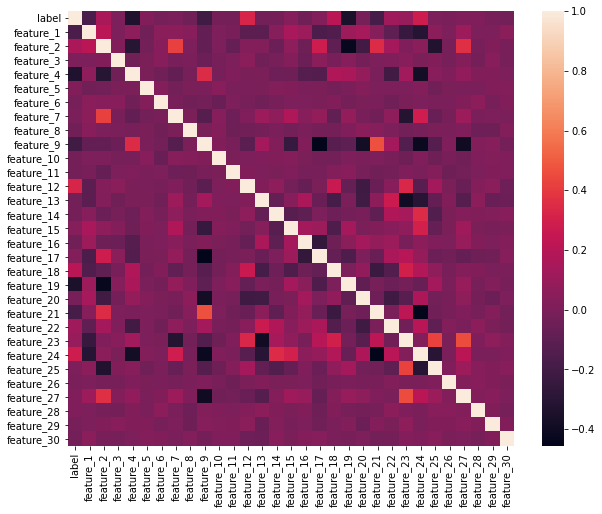

In [7]:
corr = mldata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values) 

According to the heatmap above, the features are not specifically correlated to one another. In this case, then, we can avoid applying PCA that would have been useful to reduce correlation between the features. 

<AxesSubplot:xlabel='label', ylabel='count'>

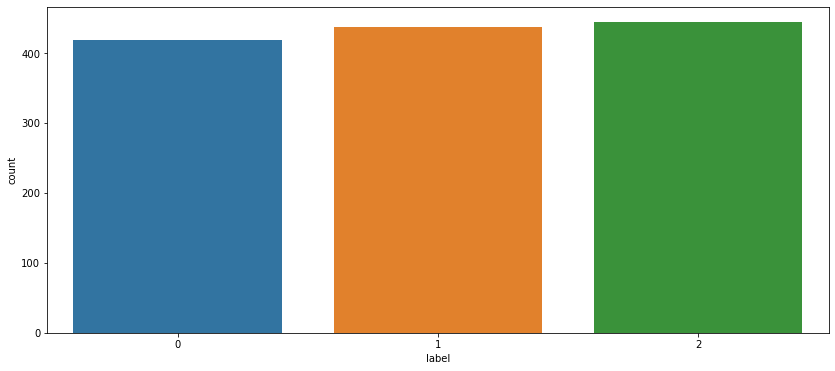

In [8]:
## countplot to visualize the distribution among the three different labels 0,1,2

plt.figure(figsize=(14,6))
sns.countplot(x='label', data=mldata)

In [9]:
## identify input features and target label

X = mldata.drop('label', axis=1)
y = mldata['label']

### Models Training and Evaluation 
For the training and testing part I followed the subsequent steps:
- I trained different models using a train/test procedure with a test size of 20%, with arbitrary hyperparameters;
- Then, I used cross validation with k=5 
- Finally, I implemented a grid search to tune the different hyperparameters and get the best combination. 

As per the models, I trained:
- K-Nearest neighbors
- Logistic Regression
- Random Forests

In [10]:
## train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

As per the preprocessing phase, given that there are neither missing features nor categorical values, I did not implemented either imputers or encoders. 
I applied a standard scaler, with the goal of standardize all features values and get better models, especially for KNN and Logistic Regression. 

In [11]:
scaler = StandardScaler()

In [12]:
## Definition of some functions:
## 	1. plot the confusion matrix after getting predictions
## 	2. calculate confusion matrix and normalize it 
##  3. plot two count plots to visualize differences between true labels and predicted ones

def plot_confusion_matrix(cm, model):
	plt.figure(figsize=(10,10))
	sns.heatmap(cm, xticklabels=model.classes_, yticklabels = model.classes_, annot=True, cmap='YlGnBu')

	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.title('Confusion matrix')
	plt.show()

def calculate_cm(y, preds):
	cm = confusion_matrix(y, preds)
	cmn = cm/cm.sum(axis=1)
	return cm, cmn

def plot_count_plot(y, preds):
	fig, ax =plt.subplots(1,2, figsize=(12,6))
	sns.countplot(y, ax=ax[0], palette='Set2').set(xlabel='True Labels', ylabel='Count')
	sns.countplot(preds, ax=ax[1], palette='Set2').set(xlabel='Predicted Labels', ylabel='Count')
	plt.show()

I used pipelines, with two steps: 
1. scaler 
2. model

#### 1. K-Nearest Neighbors 

First, I have trained a KNN with 5 neighbors on the training set, and evaluated predictions based on the test set.

In [13]:
pipe_knn = Pipeline(steps=[('scaler', scaler), 
    ('model', KNeighborsClassifier(n_neighbors=5))
])

pipe_knn.fit(X_train, y_train)
preds_knn = pipe_knn.predict(X_test)


After making predictions, plotting the confusion matrix we get that the model predicted right: 
- label 0: 84%
- label 1: 85%
- label 2: 68%

with a general accuracy score of 0.7846153846153846. 

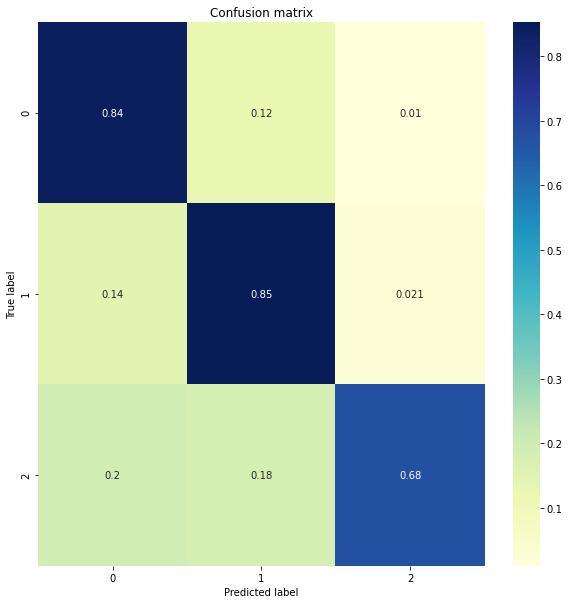

Mean Squared Error is: 0.4
Accuracy score is: 0.7846153846153846


In [14]:
cm_knn, cmn_knn = calculate_cm(y_test, preds_knn)
plot_confusion_matrix(cmn_knn, pipe_knn)
print(f'Mean Squared Error is: {mean_squared_error(y_test, preds_knn)}') 
print(f'Accuracy score is: {accuracy_score(y_test, preds_knn)}')

In [15]:
cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7913461538461539

In [16]:
pipe_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

For the parameters to pass to GridSearcCV, I decided to test 'leaf_size' and 'p'. In particular, for the case of 'p' that represents the parameter for the Minkowski metrics, I evaluated 'p=1' (Manhattan distance) and 'p=2' (euclidean distance). 

In [17]:
params_knn = {}
params_knn['model__leaf_size'] = [30,60]
params_knn['model__p'] = [1,2]

In [18]:
grid_knn = GridSearchCV( Pipeline(steps=[('scaler', scaler), 
    ('model', KNeighborsClassifier())]), 
    param_grid=params_knn, 
    cv=5, 
    scoring='accuracy') 

Again, I trained the model on the training set with a complete new pipeline so that in the prediction step I don't have a model that has already dealt with the testing set. 

In [19]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [30, 60], 'model__p': [1, 2]},
             scoring='accuracy')

The following last steps show the best parameters for KNN: 
- leaf_size = 30
- p = 2 (Euclidean distance)

The accuracy score considering the testing set is 0.7846153846153846

In [20]:
grid_knn.best_params_

{'model__leaf_size': 30, 'model__p': 2}

In [21]:
grid_knn.best_score_

0.7913461538461539

In [22]:
best_knn = grid_knn.best_estimator_.predict(X_test)
accuracy_score(y_test,best_knn)

0.7846153846153846

Finally, we can visualize the distribution of the true data against the distribution of the predicted data, through a countplot. 

/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


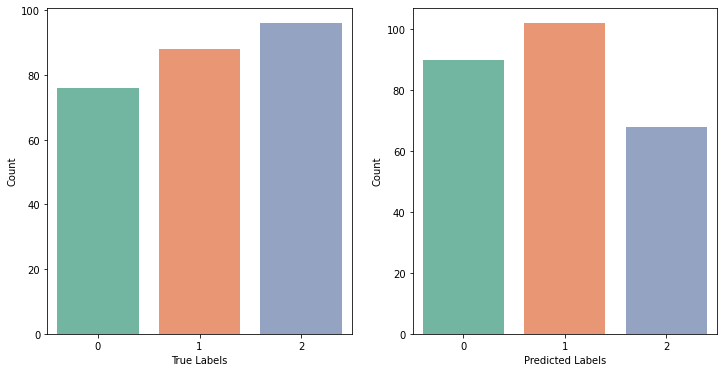

In [28]:
plot_count_plot(y_test, best_knn)

#### 2. Logistic Regression

As per Logistic Regression, I have first trained a model with an arbitrary parameter of max_iter=100 on the training set. 

In [29]:
pipe_lr = Pipeline(steps=[('scaler', scaler), 
    ('model', LogisticRegression(max_iter=100, random_state=2))
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=2))])

In [30]:
preds_lr = pipe_lr.predict(X_test)
prob_lr = pipe_lr.predict_proba(X_test)

Looking at the confusion matrix, the model predicted in the right way:
- label 0: 79%
- label 1: 64%
- label 2: 72%

The total accuracy score is 0.7115384615384616

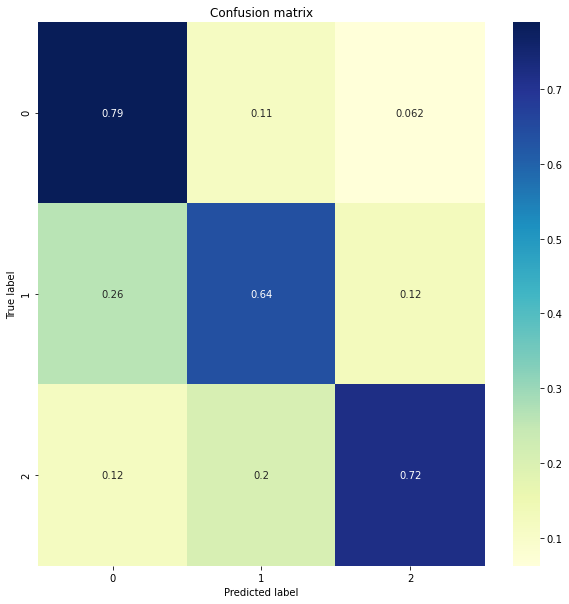

Mean Squared Error is: 0.46153846153846156
Accuracy score is: 0.7115384615384616


In [31]:
cm_lr, cmn_lr = calculate_cm(y_test, preds_lr)
plot_confusion_matrix(cmn_lr, pipe_lr)
print(f'Mean Squared Error is: {mean_squared_error(y_test, preds_lr)}')
print(f'Accuracy score is: {accuracy_score(y_test, preds_lr)}')

In [32]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [33]:
cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7326923076923076

For the parameters grid to test through GridSearchCV, I have taken into consideration:
- 'penalty', using the Euclidean Distance
- 'C', which represents the inverse of the regularization parameter
- 'solver', whose choice was somehow forced based on the 'penalty' parameter as, looking at the documentation, specific solvers go with specific penalty measures
- 'max_iter', to limit the iterations used in the solver algorithm, in this case I tested 4 different cases. 


In [34]:
params_lr = {}
params_lr['model__C'] = np.linspace(1e-3, 1e3, num=20)
params_lr['model__penalty'] = ['l2']
params_lr['model__solver'] = ['lbfgs', 'saga']
params_lr['model__max_iter'] = np.linspace(start=50, stop=200, num=4)

In [35]:
grid_lr = GridSearchCV(Pipeline(steps=[('scaler', scaler), 
    ('model', LogisticRegression(random_state=2))]), 
    param_grid=params_lr, 
    cv=5, 
    scoring='accuracy')

In [36]:
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=2))]),
             param_grid={'model__C': array([1.00000000e-03, 5.26325263e+01, 1.05264053e+02, 1.57895579e+02,
       2.10527105e+02, 2.63158632e+02, 3.15790158e+02, 3.68421684e+02,
       4.21053211e+02, 4.73684737e+02, 5.26316263e+02, 5.78947789e+02,
       6.31579316e+02, 6.84210842e+02, 7.36842368e+02, 7.89473895e+02,
       8.42105421e+02, 8.94736947e+02, 9.47368474e+02, 1.00000000e+03]),
                         'model__max_iter': array([ 50., 100., 150., 200.]),
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'saga']},
             scoring='accuracy')

After training the model on the training set, I got the subsequent results:
- best hyperparameters, among the ones tested, are:
    - 'solver': lbfgs
    - 'penalty': l2
    - 'max_iter': 50
    
After making some predictions using the test set, we get an accuracy score of 0.7115384615384616. 

In [37]:
grid_lr.best_params_

{'model__C': 52.63252631578947,
 'model__max_iter': 50.0,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [38]:
grid_lr.best_score_

0.7317307692307692

In [36]:
best_lr = grid_lr.best_estimator_.predict(X_test)
accuracy_score(y_test, best_lr)

0.7115384615384616

/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


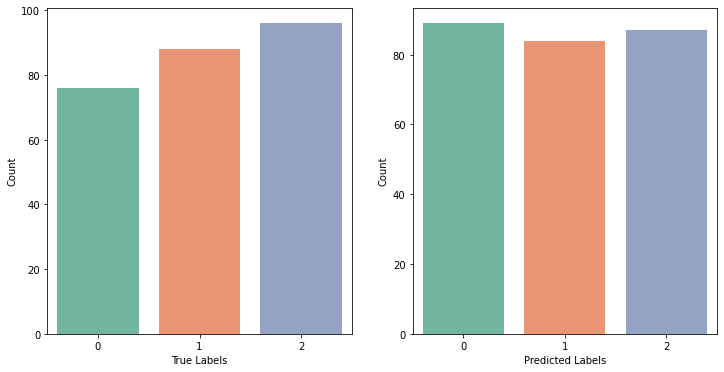

In [37]:
plot_count_plot(y_test, best_lr)

#### 3. Random Forest

For the RandomForestClassifier, I trained a model with an arbitrary number of estimators equal to 500. Subsequently, using GridSearchCV, I tested different values for this hyperparameter. 

In [38]:
pipe_rf = Pipeline(steps=[('scaler', scaler), 
    ('model', RandomForestClassifier(n_estimators=500, random_state=2))
])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=500, random_state=2))])

In [39]:
preds_rf = pipe_rf.predict(X_test)
prob_rf = pipe_rf.predict_proba(X_test)

In this case, looking at the confusion matrix we have that the model predicted in the right way:
- label 0: 88%
- label 1: 77%
- label 2: 81%

The total accuracy score is 0.8192307692307692

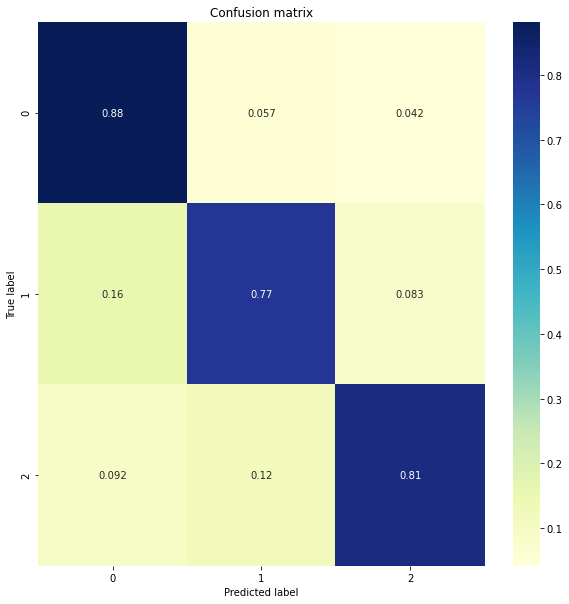

Mean Squared Error is: 0.3076923076923077
Accuracy score is: 0.8192307692307692


In [40]:
cm_rf, cmn_rf = calculate_cm(y_test, preds_rf)
plot_confusion_matrix(cmn_rf, pipe_rf)
print(f'Mean Squared Error is: {mean_squared_error(y_test, preds_rf)}')
print(f'Accuracy score is: {accuracy_score(y_test, preds_rf)}')

In [41]:
cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8182692307692309

In [42]:
pipe_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

For the parameter grid to test with random forests, I decided to change the number of estimators, testing 10 different values in the range (10,500), and whether or not to use bootstrap, to sample from different subsets of the dataset when building the trees. 

In [43]:
params_rf = {'model__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
               'model__bootstrap': [True, False], 
            }

In [44]:
grid_rf = GridSearchCV(Pipeline(steps=[('scaler', scaler), 
    ('model', RandomForestClassifier(random_state=2))]), 
    param_grid = params_rf, 
    cv = 5,
    scoring='accuracy')

In [45]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=2))]),
             param_grid={'model__bootstrap': [True, False],
                         'model__n_estimators': [10, 64, 118, 173, 227, 282,
                                                 336, 391, 445, 500]},
             scoring='accuracy')

After fitting the model, according to the best number of estimators is 500, without using bootstrap. 
The accuracy of the model using the test set with the found parameters is 0.823076923076923, which is the highest among the trained models. 

In [46]:
grid_rf.best_params_

{'model__bootstrap': False, 'model__n_estimators': 500}

In [47]:
grid_rf.best_score_

0.8278846153846153

In [48]:
best_rf = grid_rf.best_estimator_.predict(X_test)
accuracy_score(y_test, best_rf)

0.823076923076923

/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/susannapaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


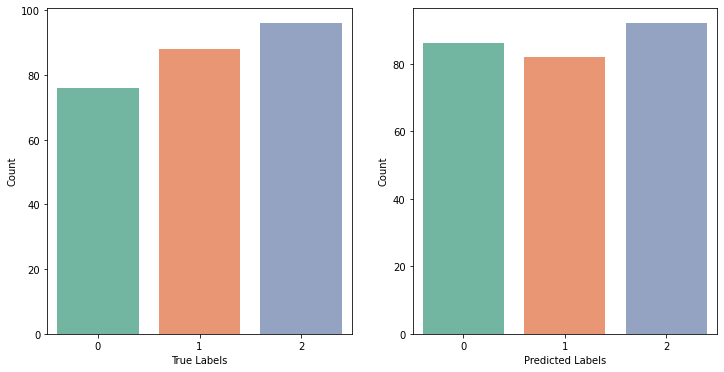

In [49]:
plot_count_plot(y_test, best_rf)

### Best Model
After the analysis, the best model among the ones trained and tested is RandomForestClassifier with the following parameters:

In [50]:
best_model = RandomForestClassifier(n_estimators=500, bootstrap=False, random_state=2)
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=2)

In [51]:
accuracy_score(y_test, best_model.predict(X_test))

0.823076923076923